In [ ]:
#General Imports
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def load_dataset(dataset_name):
    if dataset_name == 'cifar100':
       (x_train, y_train), (x_test, y_test) = cifar100.load_data()
       num_classes = 100
    else:
       raise ValueError("Dataset is not supported")

    #Data preprocessing
    x_train, x_test = x_train / 255.0, x_test / 255.0

    #one-hot encoding
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

In [ ]:
def train_model(dataset_name):
    x_train, y_train, x_test, y_test, num_classes = load_dataset(dataset_name)

    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    #Fine-tuning
    base_model.trainable = True
    for layer in base_model.layers[:-15]:
        layer.trainable = False

    #Fully-connected layer
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    x = Dense(num_classes, activation='softmax')(x)

    fine_tuning_model = Model(inputs=base_model.input, outputs=x)

    #Compile model
    fine_tuning_model.compile(
        optimizer= Adam(5e-6),#1e-5 and 1e-6
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    #Data Augmentation
    datagen = ImageDataGenerator(
        rotation_range= 15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )
    datagen.fit(x_train)

    #fit
    history1 = fine_tuning_model.fit(
        datagen.flow(x_train, y_train, batch_size=32),
        validation_data = (x_test, y_test),
        epochs=20,
        batch_size=32
    )

    #plot the data
    plt.plot(history1.history['accuracy'], label=f'{dataset_name} Train Accuracy')
    plt.plot(history1.history['val_accuracy'], label=f'{dataset_name} Validation Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 62ms/step - accuracy: 0.0659 - loss: 4.4097 - val_accuracy: 0.2043 - val_loss: 3.5178
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.2133 - loss: 3.5508 - val_accuracy: 0.2839 - val_loss: 3.1744
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 56ms/step - accuracy: 0.2888 - loss: 3.1937 - val_accuracy: 0.3333 - val_loss: 2.9284
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.3352 - loss: 2.9691 - val_accuracy: 0.3551 - val_loss: 2.7661
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.3738 - loss: 2.7753 - val_accuracy: 0.4019 - val_loss: 2.5677
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4080 - loss: 2.6262 - val_accuracy: 0.4303 - val_loss: 2.4300
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4354 - loss: 2.4870 - val_accuracy: 0.4454 - val_loss: 2.3267
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.4529 - loss: 2.3

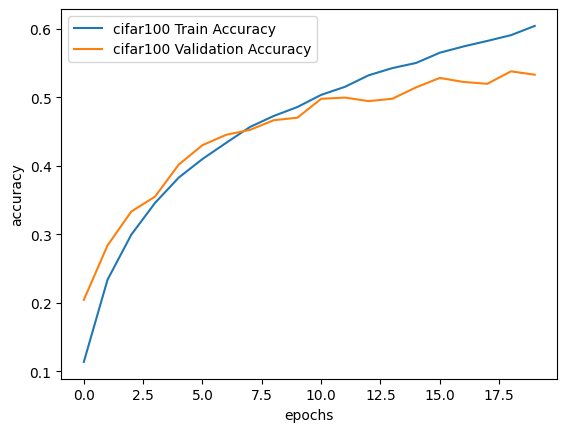

In [ ]:
train_model('cifar100')